In [25]:
num_flips = 30
num_heads = 22
from matplotlib import pyplot as plt

In [13]:
from random import randint
N = 0
num_trials = 10
for trial_num in range(num_trials): #Creating 10 trials, each with 30 coin flips
    trial = [randint(0,1) for flip in range(num_flips)]
    if sum(trial)>= 22:
        N += 1

prob_22_flip = N/num_trials
print("the prob. of 22 or more heads is {}".format(prob_22_flip)) #nice way to insert number in a sentence

the prob. of 22 or more heads is 0.0


In [76]:
#replicating with Numpy
import numpy as np
np.random.seed(42)
num_trials = 10000
trials = np.random.randint(2,size =(num_trials,num_flips))
num_heads = trials.sum(axis=1)

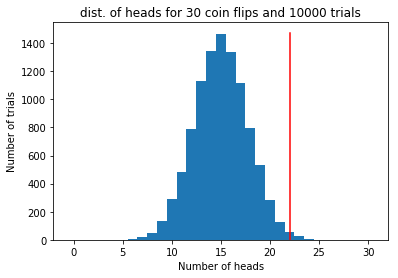

In [77]:
%matplotlib inline
plt.hist(num_heads,bins=(np.arange(32) - 0.5)) #Set up bin so that the "spike" of the bins is the number
plt.xlabel("Number of heads")
plt.ylabel("Number of trials")
plt.title("dist. of heads for 30 coin flips and 10000 trials")
plt.plot([22,22],[0,1475],'r')

# Shuffle Simulation

In [37]:
star_belly_iqs = np.array([84,72,57,46,63,76,99,91])
plain_belly_iqs = np.array([81,69,74,61,56,87,69,65,66,44,62,69])

In [41]:
print('means',star_belly_iqs.mean(),plain_belly_iqs.mean())
print('count',len(star_belly_iqs),len(plain_belly_iqs))

means 73.5 66.91666666666667
count 8 12


In [52]:
iqs = np.hstack([star_belly_iqs,plain_belly_iqs])

In [58]:
iqs.shape

(20,)

In [60]:
np.random.permutation(10) #shuffle & use this as an index to get the values from array

array([1, 3, 9, 4, 8, 5, 6, 2, 0, 7])

In [78]:
all_trials = []
num_trials = 10000
for trial in range(num_trials):
    perm = np.random.permutation(len(iqs))
    all_trials.append(iqs[perm])
shuffles = np.array(all_trials)

In [63]:
shuffles.shape

(10000, 20)

In [79]:
measured_diff = star_belly_iqs.mean()-plain_belly_iqs.mean()
measured_diff

6.583333333333329

In [80]:
shuffles[:,:len(star_belly_iqs)]     

array([[69, 56, 57, ..., 61, 81, 66],
       [81, 63, 57, ..., 84, 72, 76],
       [76, 87, 72, ..., 56, 69, 46],
       ...,
       [44, 99, 84, ..., 81, 61, 91],
       [46, 62, 84, ..., 99, 63, 76],
       [81, 65, 91, ..., 44, 72, 56]])

In [89]:
shuffles[:,:len(star_belly_iqs)].shape

(10000, 8)

In [100]:
shuffles[:,:len(star_belly_iqs)].mean(axis=1)

array([70.375, 68.25 , 70.25 , ..., 73.875, 70.625, 68.5  ])

In [99]:
diffs = shuffles[:,:len(star_belly_iqs)].mean(axis=1) - shuffles[:,:len(star_belly_iqs)].mean(axis=1)

In [102]:
diffs.shape

(10000,)

In [101]:
100*(diffs >= measured_diff).sum()/num_trials #the number of True # Check. Should be 16.84

0.0

# EDA

In [119]:
import sklearn
from sklearn import datasets

In [127]:
data = datasets.base.load_boston()

In [128]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3